In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('procedimento_ml.csv', sep = ';')
df

,Data,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Brasil
0,01/2008,-,10,27,2,263,25,23,165,90,...,466,2339,1078,532,1061,122,62,209,118,9495
1,02/2008,20,17,88,7,260,14,74,178,110,...,660,5250,2020,684,2770,187,186,560,135,18616
2,03/2008,1,28,80,7,762,8,63,181,116,...,1085,5098,1851,890,2136,273,102,529,120,19190
3,04/2008,-,18,91,8,314,23,62,160,119,...,888,4638,1676,890,2392,266,110,488,168,17677
4,05/2008,-,22,108,1,347,28,93,156,128,...,860,5289,1742,944,2169,227,160,552,242,18558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,06/2021,59,13,127,2,259,39,58,192,205,...,1311,4473,1589,1159,2070,212,311,566,299,18383
162,07/2021,59,28,102,1,256,27,62,264,202,...,1238,4838,1614,1007,2261,178,217,590,355,19519
163,08/2021,84,27,116,8,216,33,68,245,235,...,1285,5294,1907,1281,2396,200,318,649,288,21303
164,09/2021,80,34,160,2,255,33,73,242,224,...,1242,5669,2068,1164,2362,156,279,723,338,22227


In [4]:
df = df[['Data', 'Brasil']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    166 non-null    object
 1   Brasil  166 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


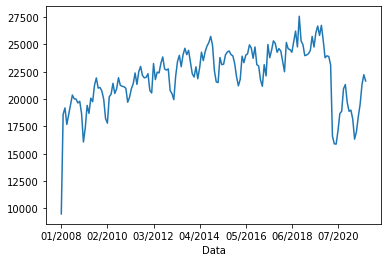

In [5]:
df.set_index('Data')['Brasil'].plot(subplots = True)
plt.show()

In [6]:
passado = df[20:144]
len(passado)

124

In [8]:
atual = df[144:]
len(atual)

22

In [9]:
forecast = []

### Parametros da leitura

In [11]:
window = 3
timesteps = 1
future = len(atual)

In [12]:
from tensorflow.python.keras.metrics import accuracy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.metrics import Accuracy

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [10]:
def prepare_data(timeseries_data, window):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    end_ix = i + window
    if end_ix > len(timeseries_data)-1:
      break
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [11]:
timeseries_data = passado['Brasil'].to_numpy(dtype = int)
real_data = atual['Brasil'].to_numpy(dtype = int)
timeseries_data, real_data

(array([21007, 21060, 20727, 19976, 18208, 17798, 20203, 20447, 21439,
        20511, 20935, 21953, 21259, 21170, 21126, 20989, 19710, 20173,
        20946, 21409, 22388, 21343, 22507, 22992, 22165, 21940, 21998,
        22317, 20793, 20556, 23249, 21785, 22466, 22393, 23274, 23855,
        22756, 22652, 22763, 20781, 20494, 19945, 22091, 23435, 24003,
        22959, 24048, 24647, 24064, 24457, 23377, 22318, 22015, 22949,
        21859, 22870, 24290, 23518, 24348, 24851, 25173, 25734, 24902,
        22600, 21570, 21506, 23799, 23147, 23194, 24044, 24302, 24401,
        24067, 23955, 23245, 22047, 21209, 21808, 23922, 23331, 24016,
        24145, 24961, 24666, 23728, 24768, 23150, 23022, 21748, 21170,
        23151, 22120, 24995, 23787, 24464, 25324, 25091, 24283, 24616,
        24394, 23439, 22501, 25174, 24597, 24522, 24286, 25252, 26219,
        24771, 27577, 25315, 24978, 23973, 24032, 24151, 24445, 25733,
        24764, 26058, 26684, 25822, 26748, 25364, 23782]),
 array([23957, 238

In [12]:
X, y = prepare_data(timeseries_data, window)
print(X), print(y)

[[21007 21060 20727]
 [21060 20727 19976]
 [20727 19976 18208]
 [19976 18208 17798]
 [18208 17798 20203]
 [17798 20203 20447]
 [20203 20447 21439]
 [20447 21439 20511]
 [21439 20511 20935]
 [20511 20935 21953]
 [20935 21953 21259]
 [21953 21259 21170]
 [21259 21170 21126]
 [21170 21126 20989]
 [21126 20989 19710]
 [20989 19710 20173]
 [19710 20173 20946]
 [20173 20946 21409]
 [20946 21409 22388]
 [21409 22388 21343]
 [22388 21343 22507]
 [21343 22507 22992]
 [22507 22992 22165]
 [22992 22165 21940]
 [22165 21940 21998]
 [21940 21998 22317]
 [21998 22317 20793]
 [22317 20793 20556]
 [20793 20556 23249]
 [20556 23249 21785]
 [23249 21785 22466]
 [21785 22466 22393]
 [22466 22393 23274]
 [22393 23274 23855]
 [23274 23855 22756]
 [23855 22756 22652]
 [22756 22652 22763]
 [22652 22763 20781]
 [22763 20781 20494]
 [20781 20494 19945]
 [20494 19945 22091]
 [19945 22091 23435]
 [22091 23435 24003]
 [23435 24003 22959]
 [24003 22959 24048]
 [22959 24048 24647]
 [24048 24647 24064]
 [24647 24064

(None, None)

In [13]:
X.shape

(121, 3)

In [14]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X.shape

(121, 3, 1)

# Modelo LSTM

In [15]:
#Definindo o modelo
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences = True, input_shape = (window, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse', metrics = [Accuracy()])

In [16]:
model.fit(X, y, epochs = 200, verbose=0)

In [17]:
x_input = np.array([25822, 26748, 25364])
temp_input = list(x_input)
list_output = []
i = 0
while i < future:
  if (len(temp_input)>3):
    x_input = np.array(temp_input[1:])
    print(f'{i} day input{x_input}')
    x_input = x_input.reshape((1, window, n_features))
    yhat = model.predict(x_input, verbose = 0)
    print(f'{i} day output {yhat}')
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    list_output.append(yhat[0][0])
    i+=1
  else:
    x_input = x_input.reshape(1, window, n_features)
    yhat = model.predict(x_input, verbose = 0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    list_output.append(yhat[0][0])
    i+=1
print(list_output)

[26179.262]
1 day input[26748.         25364.         26179.26171875]
1 day output [[26208.66]]
2 day input[25364.         26179.26171875 26208.66015625]
2 day output [[25911.654]]
3 day input[26179.262 26208.66  25911.654]
3 day output [[26230.45]]
4 day input[26208.66  25911.654 26230.45 ]
4 day output [[26187.635]]
5 day input[25911.654 26230.45  26187.635]
5 day output [[26169.852]]
6 day input[26230.45  26187.635 26169.852]
6 day output [[26291.502]]
7 day input[26187.635 26169.852 26291.502]
7 day output [[26287.629]]
8 day input[26169.852 26291.502 26287.629]
8 day output [[26325.395]]
9 day input[26291.502 26287.629 26325.395]
9 day output [[26384.572]]
10 day input[26287.629 26325.395 26384.572]
10 day output [[26407.871]]
11 day input[26325.395 26384.572 26407.871]
11 day output [[26451.318]]
12 day input[26384.572 26407.871 26451.318]
12 day output [[26494.2]]
13 day input[26407.871 26451.318 26494.2  ]
13 day output [[26528.771]]
14 day input[26451.318 26494.2   26528.771]


In [18]:
previsao_modelo = []
for c in list_output:
    previsao_modelo.append(round(c))

In [19]:
previsao_modelo

[26179,
 26209,
 25912,
 26230,
 26188,
 26170,
 26292,
 26288,
 26325,
 26385,
 26408,
 26451,
 26494,
 26529,
 26571,
 26610,
 26649,
 26689,
 26728,
 26768,
 26808,
 26848]

In [20]:
previsto = pd.DataFrame(columns = ['Data','previsto'])
previsto['Data'] = atual['Data']
previsto['previsto'] = previsao_modelo
previsto

,Data,previsto
144,01/2020,26179
145,02/2020,26209
146,03/2020,25912
147,04/2020,26230
148,05/2020,26188
149,06/2020,26170
150,07/2020,26292
151,08/2020,26288
152,09/2020,26325
153,10/2020,26385


In [21]:
import seaborn as sns

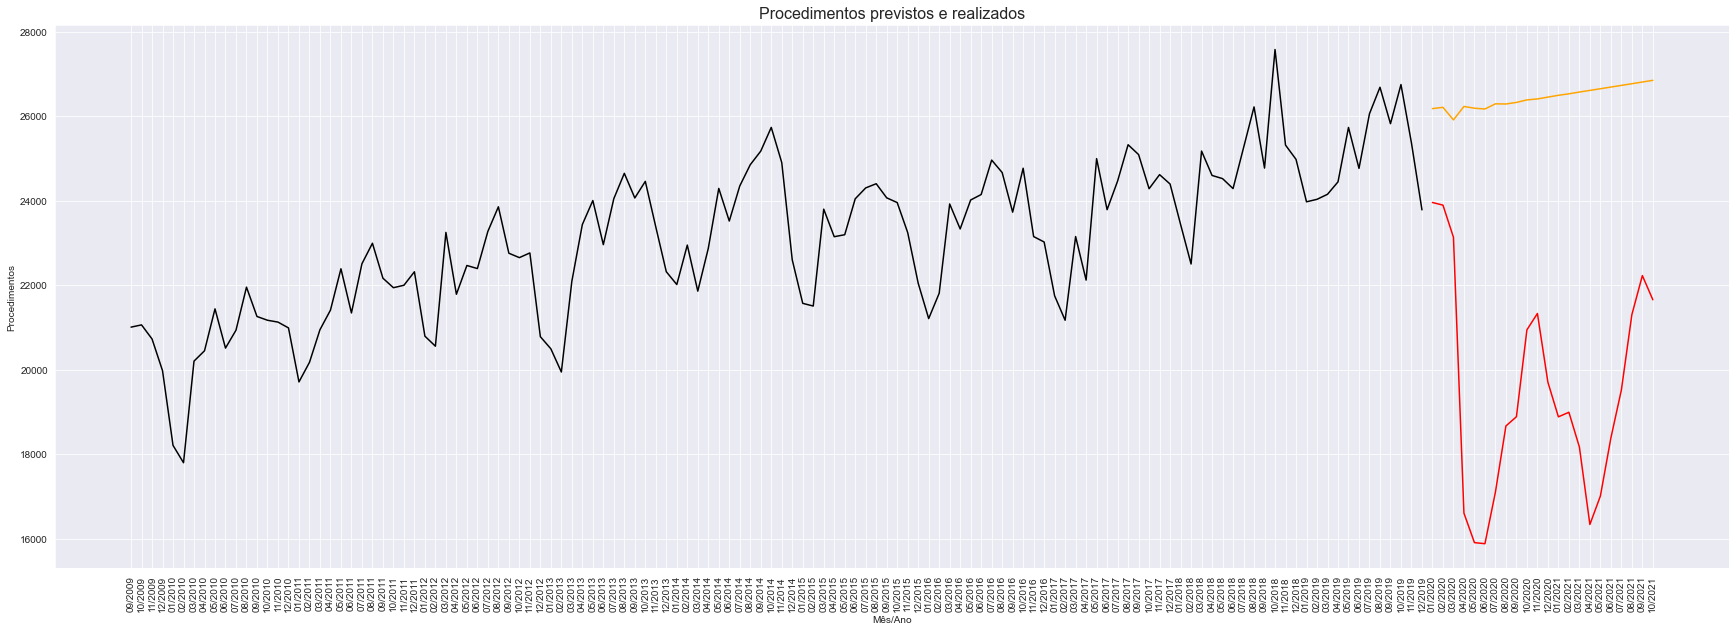

In [24]:
sns.set_style('darkgrid')
sns.set_palette('viridis')
fig, ax = plt.subplots(figsize = (30,10))
plt.title('Procedimentos previstos e realizados', fontsize = 16)
sns.lineplot(x = 'Data', y = 'Brasil', color = 'Black', data = passado)
sns.lineplot(x = 'Data', y ='Brasil', color = 'red', data = atual)
sns.lineplot(x = 'Data', y = 'previsto', color = 'Orange', data = previsto)
plt.ylabel("Procedimentos")
plt.xlabel('Mês/Ano')
plt.xticks(rotation = 90)
plt.show()

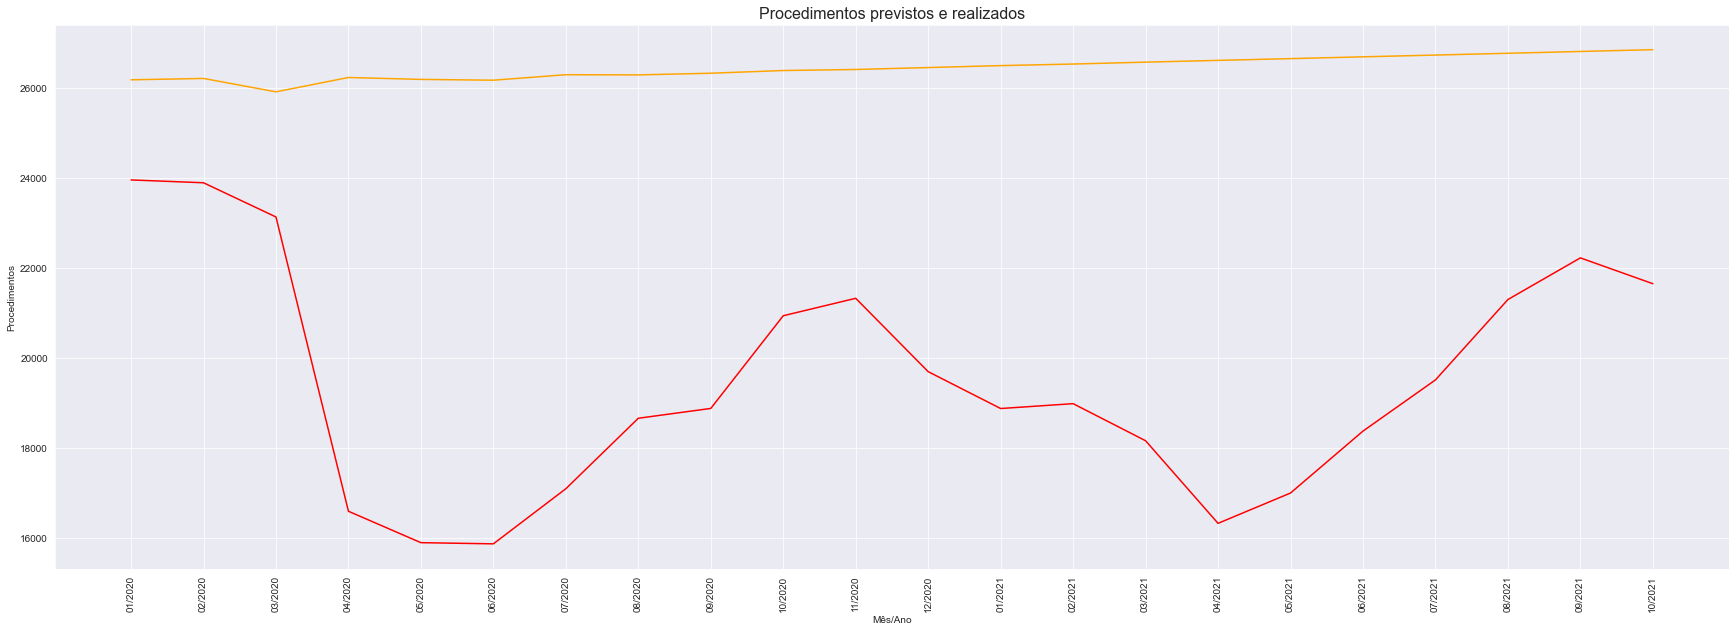

In [25]:
sns.set_style('darkgrid')
sns.set_palette('viridis')
fig, ax = plt.subplots(figsize = (30,10))
plt.title('Procedimentos previstos e realizados', fontsize = 16)
sns.lineplot(x = 'Data', y ='Brasil', color = 'red', data = atual)
sns.lineplot(x = 'Data', y = 'previsto', color = 'Orange', data = previsto)
plt.ylabel("Procedimentos")
plt.xlabel('Mês/Ano')
plt.xticks(rotation = 90)
plt.show()